In [2]:
import pandas as pd
import dalecLoad
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [3]:
tables = dalecLoad.multiLogLoad('data/20-jun-22/Logs_20-Jun-22_20220623.dtf', dropNA=False)

In [3]:
# hacky way to get readings which are probably good...
# actually this doesn't work that well! 
Log1 = tables['Log 1'].drop(tables['Log 1'].loc[pd.to_numeric(tables['Log 1'][' Pitch']) <= 1.0].index)
Log2 = tables['Log 2'].drop(tables['Log 2'].loc[pd.to_numeric(tables['Log 2'][' Pitch']) <= 1.0].index)
Log1.index.get_level_values('Sample #')

Int64Index([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
            ...
            66, 66, 66, 66, 66, 66, 66, 66, 66, 66],
           dtype='int64', name='Sample #', length=27600)

In [5]:
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/20-jun-22/Logs_20-Jun-22_20220623.dtf')
#mean_bridge = dalecLoad.uniform_grid_spectra_mean(Log1, spect_wavelengths)
#mean_bridge

In [ ]:
mean_jetty = dalecLoad.uniform_grid_spectra_mean(Log2, spect_wavelengths)

In [ ]:
# very simple Rrs calculation
RHO = 0.028
#Rrs_10 = (Lu_10[:, 1] - (RHO * Lsky_10[:, 1])) / Ed_10[:, 1]

mean_bridge['Rrs'] = (mean_bridge['Lu_mean'] - (RHO * mean_bridge['Lsky_mean'])) / mean_bridge['Ed_mean']
mean_jetty['Rrs'] = (mean_jetty['Lu_mean'] - (RHO * mean_jetty['Lsky_mean'])) / mean_jetty['Ed_mean']

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(mean_bridge['Wavelength'], mean_bridge['Rrs'], label='Airthrey Bridge')
ax[1].plot(mean_jetty['Wavelength'], mean_jetty['Rrs'], label='Airthrey Jetty')
ax[0].legend()
ax[1].legend()

plt.show()

(0.0, 0.005)

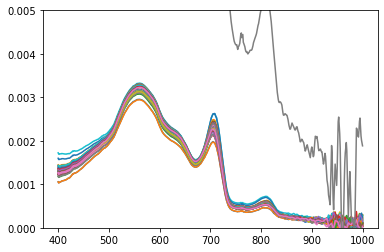

In [6]:
# this seems to be the nicest way to do it! 

for sample in tables['Log 1'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 1'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])
plt.ylim(0, 0.005)

(0.0, 0.007)

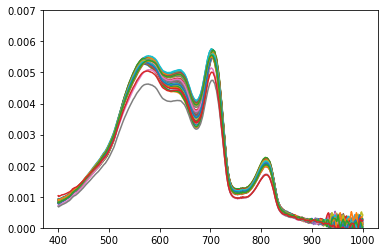

In [7]:
for sample in tables['Log 2'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 2'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])
plt.ylim(0, 0.007)

(0.0, 0.007)

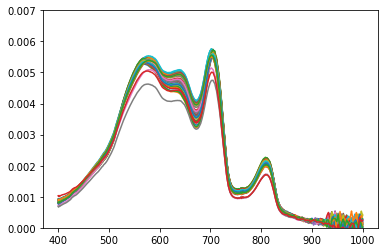

In [12]:
for sample in tables['Log 2'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 2'].loc[sample],
                                                 spect_wavelengths,
                                                 nsteps=50000)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])
plt.ylim(0, 0.007)